In [32]:
import os
import numpy as np
#import scipy
from scipy.io import wavfile
from scipy.signal import get_window
import scipy.fftpack as fft
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd              #data analysis and maniplation
from tqdm import tqdm            #show progress bar(i.e., downloading or epoch)
import matplotlib.pyplot as plt
import resampy

from PIL import Image

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten, LSTM, Conv1D, Conv2D, MaxPooling1D, GlobalMaxPool1D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, layers, Model, callbacks, optimizers
from tensorflow.keras.models import load_model
from numpy import unique
import sklearn

In [33]:
dataset_path ='data'
metadata=pd.read_csv("sign_metadata.csv")

In [34]:
metadata

,fname,label
0,roundabout_sign_0.png,roundabout_sign
1,roundabout_sign_1.png,roundabout_sign
2,roundabout_sign_10.png,roundabout_sign
3,roundabout_sign_11.png,roundabout_sign
4,roundabout_sign_12.png,roundabout_sign
...,...,...
245,yield_sign_5.png,yield_sign
246,yield_sign_6.png,yield_sign
247,yield_sign_7.png,yield_sign
248,yield_sign_8.png,yield_sign


In [35]:
uniLabel=metadata.label.unique()
print(uniLabel.shape)

(5,)


In [36]:
metadata['label'].value_counts()

roundabout_sign    50
stop_sign          50
traffic_cone       50
traffic_light      50
yield_sign         50
Name: label, dtype: int64

In [42]:
extracted_features = []
data = []

# iterrows() generates an iterator object of a dataframe
# "tqdm" generates a progress bar for this for loop
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(dataset_path)+'\\',str(row["fname"]))
    final_class_labels = row["label"]
 
    
    data = np.array(Image.open(file_name))
    #print(data.shape)

    # create an array that contians all the files and their impedence value
    extracted_features.append([data,final_class_labels])

250it [00:00, 604.84it/s]

[[array([[[  0,  27,  64],
        [  0,  27,  64],
        [  0,  27,  64],
        ...,
        [  2,  25,  67],
        [  2,  25,  67],
        [  2,  25,  67]],

       [[  0,  27,  64],
        [  0,  27,  64],
        [  0,  27,  64],
        ...,
        [  2,  25,  67],
        [  2,  25,  67],
        [  2,  25,  67]],

       [[  0,  27,  64],
        [  0,  27,  64],
        [  0,  28,  65],
        ...,
        [  3,  26,  68],
        [  2,  25,  67],
        [  2,  25,  67]],

       ...,

       [[ 53,  70,  90],
        [ 63,  80, 100],
        [ 70,  87, 107],
        ...,
        [ 86, 102, 127],
        [ 73,  89, 114],
        [ 81,  97, 122]],

       [[ 73,  90, 110],
        [ 81,  98, 118],
        [ 70,  87, 107],
        ...,
        [ 84, 100, 125],
        [ 71,  87, 112],
        [ 77,  93, 118]],

       [[ 72,  89, 109],
        [ 68,  85, 105],
        [ 77,  94, 114],
        ...,
        [ 74,  90, 115],
        [ 79,  95, 120],
        [ 77,  93, 118

In [43]:
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[[[0, 27, 64], [0, 27, 64], [0, 27, 64], [0, 2...",roundabout_sign
1,"[[[2, 27, 67], [2, 27, 67], [2, 27, 67], [2, 2...",roundabout_sign
2,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
3,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
4,"[[[2, 27, 67], [2, 27, 67], [2, 27, 67], [2, 2...",roundabout_sign
5,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
6,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
7,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign
8,"[[[0, 28, 67], [0, 28, 67], [0, 28, 67], [0, 2...",roundabout_sign
9,"[[[2, 28, 65], [2, 28, 65], [2, 28, 65], [2, 2...",roundabout_sign


In [44]:
imageData=np.array(extracted_features_df['feature'].tolist())
imageClass=np.array(extracted_features_df['class'].tolist())

C:\Users\wang5350\AppData\Local\Temp\ipykernel_18592\1420864064.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imageData=np.array(extracted_features_df['feature'].tolist())


In [45]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
imageClass = to_categorical(labelencoder.fit_transform(imageClass))

In [46]:
from sklearn.model_selection import train_test_split
#split the data set into train and test in protion of 4 to 1.
dataTrain, dataVal, classTrain, classVal = train_test_split(imageData,imageClass,test_size=0.2,random_state=0)

In [22]:
image_size = (256, 256)

train_ds, val_ds = utils.image_dataset_from_directory(
    dataset_path,
    label_mode = "categorical",
    labels = "inferred",
    subset = "both",
    seed = 2,
    validation_split = 0.2
)

print(val_ds[0][0])

Found 250 files belonging to 5 classes.
Using 200 files for training.
Using 50 files for validation.


TypeError: 'BatchDataset' object is not subscriptable

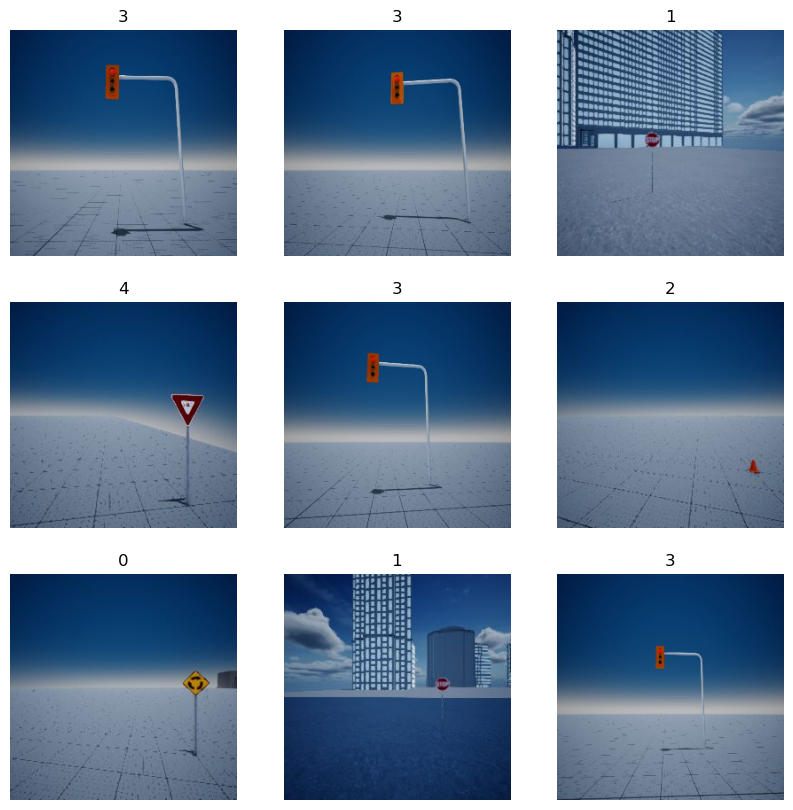

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [8]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

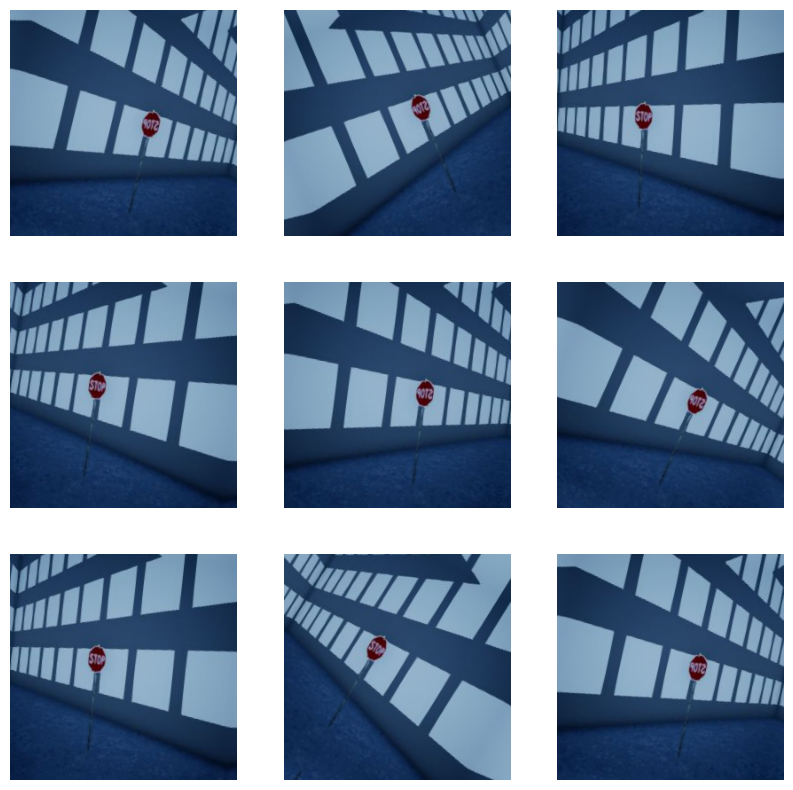

In [9]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [10]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [11]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(5))
model.add(layers.Activation('Softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [13]:
print(train_ds)
#print(val_ds[1])


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [14]:
epochs = 100
num_batch_size = 15

print(train_ds)

checkpointer = callbacks.ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)

model.compile(
    optimizer="Adam",
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(
    train_ds,
    epochs=epochs,
    batch_size = num_batch_size,
    callbacks=checkpointer,
    validation_data=val_ds,
)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 2.0530 - accuracy: 0.2800
Epoch 1: val_loss improved from inf to 1.26096, saving model to saved_models\audio_classification.hdf5
7/7 [==============================] - 4s 85ms/step - loss: 2.0530 - accuracy: 0.2800 - val_loss: 1.2610 - val_accuracy: 0.5600
Epoch 2/100
4/7 [================>.............] - ETA: 0s - loss: 1.2342 - accuracy: 0.5078
Epoch 2: val_loss improved from 1.26096 to 1.14670, saving model to saved_models\audio_classification.hdf5
7/7 [==============================] - 0s 41ms/step - loss: 1.2380 - accuracy: 0.4550 - val_loss: 1.1467 - val_accuracy: 0.5800
Epoch 3/100
4/7 [================>.............] - ETA: 0s - loss: 1.3319 - accuracy: 0.4375
Epoch 3: val_loss improved from 1.14670 to 0.95924, saving model to saved_models\audio_classification

In [15]:
# block that prepare the confusion matrix. In here we use test data.

# declaration
predictedLabels = []
trueLabels = []
model = load_model('saved_models/audio_classification.hdf5')

y_pred = model.predict(val_ds)
y_pred_list = [int(x[0]) for x in y_pred] 
y_true = []
print(sklearn.metrics.confusion_matrix(y_true, y_pred_list))


2/2 [==============================] - 0s 17ms/step


AttributeError: module 'sklearn' has no attribute 'metrics'